<a href="https://colab.research.google.com/github/Laisalkk/tugas/blob/main/23083010055_laisal_kaffi_eda_statistika_deskriptif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
# 1. Penjelasan Dataset:
# Dataset ini tampaknya terkait dengan permainan catur online, yang memuat berbagai informasi terkait
# setiap pertandingan yang dimainkan, seperti rating pemain, status kemenangan, dan informasi terkait
# pembukaan catur. Setiap baris dalam dataset mewakili satu pertandingan antara pemain putih dan pemain hitam.

# Berikut ini adalah penjelasan singkat tentang setiap kolom dalam dataset:

# 2. Metadata (Penjelasan Kolom):
# Nama Kolom        | Tipe Data  | Deskripsi
# ----------------- | ---------- | -------------------------------------------------------------
# id                | Nominal    | ID unik untuk setiap pertandingan.
# victory_status    | Kategorikal| Status kemenangan yang mungkin berupa "mate", "resign", atau "draw".
# winner            | Kategorikal| Pemenang dari pertandingan, bisa berupa "white", "black", atau "draw".
# white_id          | Nominal    | ID unik pemain putih.
# black_id          | Nominal    | ID unik pemain hitam.
# white_rating      | Numerik    | Rating pemain putih sebelum pertandingan dimulai.
# black_rating      | Numerik    | Rating pemain hitam sebelum pertandingan dimulai.
# moves             | Numerik    | Jumlah langkah yang dimainkan selama pertandingan.
# opening_eco       | Kategorikal| Kode ECO (Encyclopaedia of Chess Openings) yang mengacu pada tipe pembukaan.
# opening_name      | Kategorikal| Nama pembukaan catur yang digunakan selama pertandingan.
# increment_code    | Kategorikal| Kode waktu tambahan per langkah setelah batas waktu utama (misalnya "15+2").
# opening_ply       | Numerik    | Jumlah langkah dalam fase pembukaan.

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Membaca file CSV
file_path = '/content/drive/My Drive/Colab Notebooks/new_catur.csv'
df = pd.read_csv(file_path)

# Menampilkan data awal dan informasi kolom
display(df.head())
print(df.info())

Mounted at /content/drive


,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              20058 non-null  object
 1   rated           20058 non-null  bool  
 2   turns           20058 non-null  int64 
 3   victory_status  20058 non-null  object
 4   winner          20058 non-null  object
 5   increment_code  20058 non-null  object
 6   white_id        20058 non-null  object
 7   white_rating    20058 non-null  int64 
 8   black_id        20058 non-null  object
 9   black_rating    20058 non-null  int64 
 10  moves           20058 non-null  object
 11  opening_eco     20058 non-null  object
 12  opening_name    20058 non-null  object
 13  opening_ply     20058 non-null  int64 
dtypes: bool(1), int64(4), object(9)
memory usage: 2.0+ MB
None


In [ ]:
# Daftar kolom numerik
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Mengganti outlier dengan median
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[col].median()

    # Menggunakan .loc untuk menghindari SettingWithCopyWarning
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median

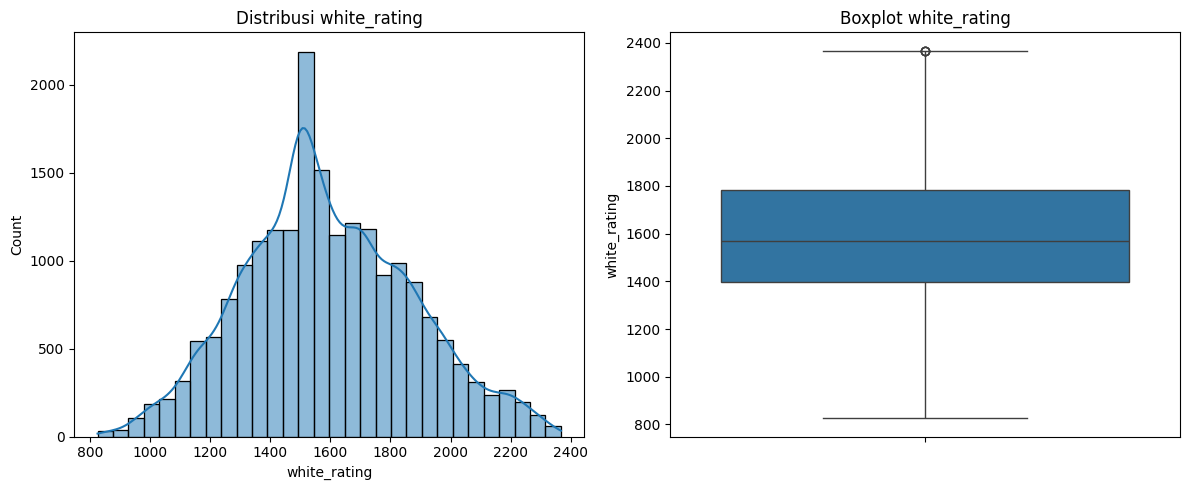

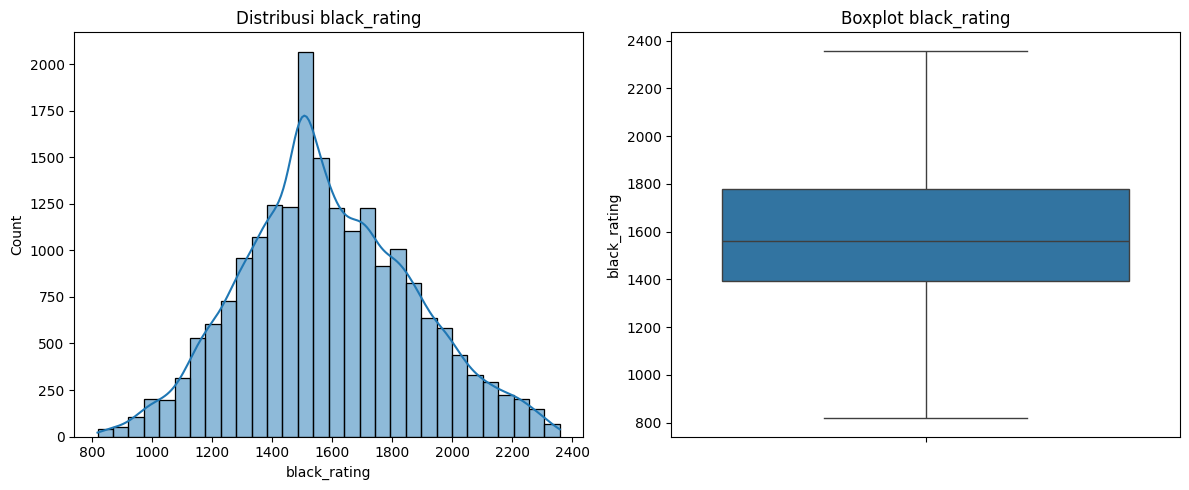

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variabel yang akan divisualisasikan (contohnya 'white_rating' dan 'black_rating')
numerical_columns = ['white_rating', 'black_rating']

for col in numerical_columns:
    plt.figure(figsize=(12, 5))

    # Histogram untuk melihat distribusi
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')

    # Box plot untuk melihat distribusi dan outlier
    plt.subplot(1, 2, 2)
    sns.boxplot(df[col])
    plt.title(f'Boxplot {col}')

    plt.tight_layout()
    plt.show()


In [ ]:
print ("Dari visualisasi histogram di atas untuk white_rating dan black_rating, kedua distribusi tampak simetris dengan puncak yang berada di sekitar nilai 1500-1600. Grafik menunjukkan bentuk yang menyerupai lonceng,\nmeskipun ada beberapa variasi di bagian ekor, terutama pada kisaran nilai tinggi dan rendah.")

Dari visualisasi histogram di atas untuk white_rating dan black_rating, kedua distribusi tampak simetris dengan puncak yang berada di sekitar nilai 1500-1600. Grafik menunjukkan bentuk yang menyerupai lonceng,
meskipun ada beberapa variasi di bagian ekor, terutama pada kisaran nilai tinggi dan rendah.


In [ ]:
from scipy.stats import skew

# Pemusatan Data (mean dan median)
mean_white = df['white_rating'].mean()
median_white = df['white_rating'].median()
mean_black = df['black_rating'].mean()
median_black = df['black_rating'].median()

# Penyebaran Data (Standar Deviasi)
std_white = df['white_rating'].std()
std_black = df['black_rating'].std()

# Menghitung Skewness
skewness_white = skew(df['white_rating'])
skewness_black = skew(df['black_rating'])

# Menampilkan hasil
print("Pemusatan dan Penyebaran Data White Rating:")
print(f"Mean: {mean_white}, Median: {median_white}, Standard Deviation: {std_white}, Skewness: {skewness_white}\n")

print("Pemusatan dan Penyebaran Data Black Rating:")
print(f"Mean: {mean_black}, Median: {median_black}, Standard Deviation: {std_black}, Skewness: {skewness_black}")


Pemusatan dan Penyebaran Data White Rating:
Mean: 1591.0973676338617, Median: 1567.0, Standard Deviation: 281.3658956863336, Skewness: 0.19526276941522758

Pemusatan dan Penyebaran Data Black Rating:
Mean: 1584.9195333532755, Median: 1562.0, Standard Deviation: 283.842753626547, Skewness: 0.18605767773067594


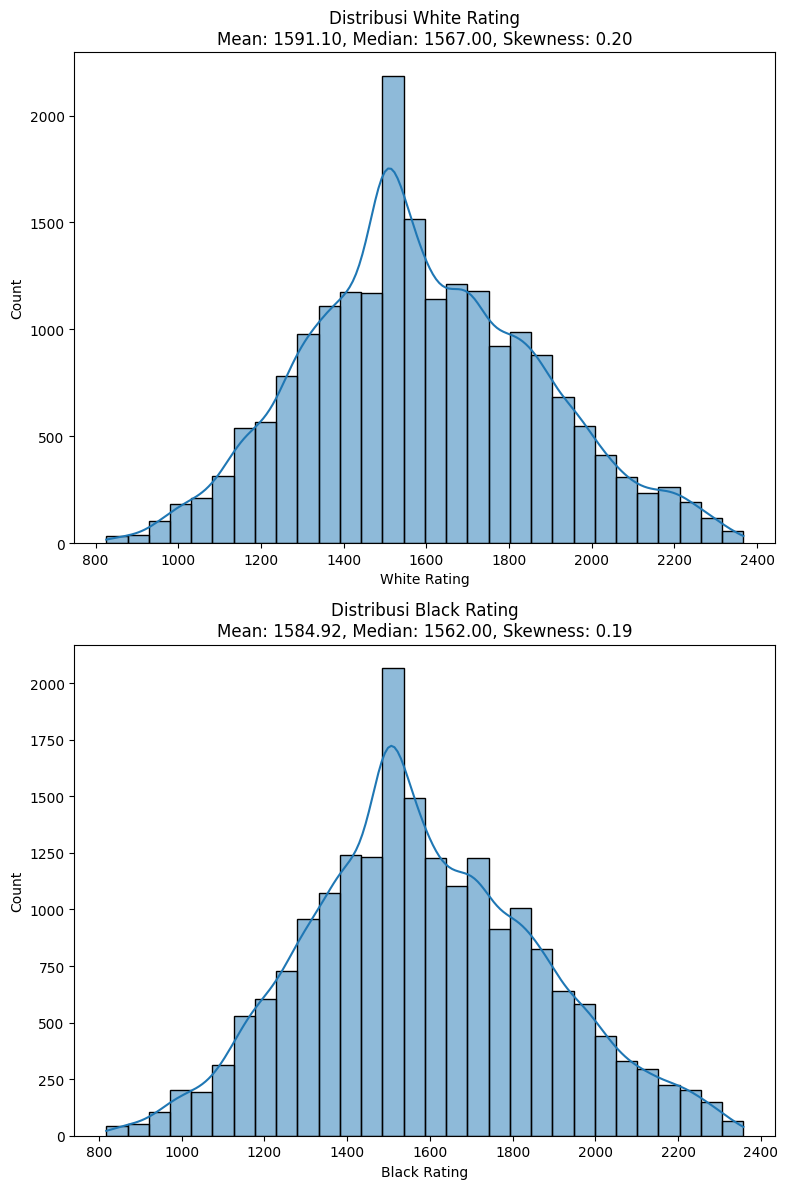

In [ ]:
# Plot distribusi setelah pemusatan dan penyebaran data
fig, axs = plt.subplots(2, 1, figsize=(8, 12))

# Visualisasi white_rating
sns.histplot(df['white_rating'], bins=30, kde=True, ax=axs[0])
axs[0].set_title(f'Distribusi White Rating\nMean: {df["white_rating"].mean():.2f}, Median: {df["white_rating"].median():.2f}, Skewness: {skew(df["white_rating"]):.2f}')
axs[0].set_xlabel('White Rating')
axs[0].set_ylabel('Count')

# Visualisasi black_rating
sns.histplot(df['black_rating'], bins=30, kde=True, ax=axs[1])
axs[1].set_title(f'Distribusi Black Rating\nMean: {df["black_rating"].mean():.2f}, Median: {df["black_rating"].median():.2f}, Skewness: {skew(df["black_rating"]):.2f}')
axs[1].set_xlabel('Black Rating')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()
